In [40]:
## %matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
figsize(8, 8)

* We assume our data is generated by a normal random variable with $\mu_{true}$ and $\sigma_{true}$.  
* However, we don't know these parameters, so we need to infer them.
* In a previous exercise, we held $\sigma$ constant, and computed the posterior distribution $P(X\;|\;\mu)$ for many values of $\mu$, to inspect the values of $\mu$ that maximized this posterior probability.
* In this exercise, we are going to model $\sigma$ as well. As in the previous exercise, we will assume that $\mu$ and $\sigma$ are normally distirubted. In this case, our prior and posterior distributions will be bivariate normal, since we have two variables, and we are assuming that they are correlated. 
* Interestingly enough, the likelihood is $\mathcal{N} \sim (\theta_1, \theta_2)$, a 1-D normal random variable, where $\theta_1$ and $\theta_2$ are the mean and standard deviation, respectively.

In [190]:
# Correlation between theta1 and theta2
sigma_theta1 = 4
sigma_theta2 = 4
mu_theta1 = 0
mu_theta2 = 3
corr = 0.9
cov = corr * (sigma_theta1 * sigma_theta2)

cov_mat  = [ [sigma_theta1**2, cov], 
         [cov, sigma_theta2**2 ]]

corr_mat = [ [1, corr], 
        [corr, 1] ]

In [211]:
# Number of variables
n = 50

In [212]:
x = y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x,y)

In [213]:
cov_mat

[[16, 14.4], [14.4, 16]]

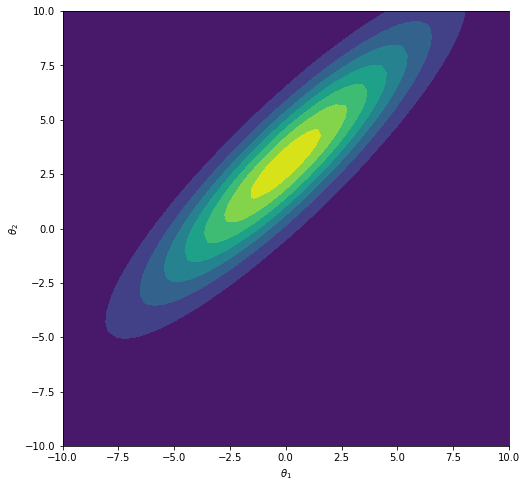

In [222]:
rv = stats.multivariate_normal(mean=[mu_theta1, mu_theta2], cov=cov_mat)
pos = np.dstack((X, Y))
priors = rv.pdf(pos)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.contourf(X, Y, priors)
plt.show()

In [215]:
theta1_true = 1
theta2_true = 3
cov_mat_true  = [ [sigma_theta1**2, cov], 
         [cov, sigma_theta2**2 ]]

data = stats.norm.rvs(loc=theta1_true, scale=theta2_true, size=(4, 1))

In [242]:
data

array([[ 2.50891146],
       [ 4.19717116],
       [ 3.14379317],
       [-1.28137325]])

In [255]:
def compute_norm(data, loc, scale):
    rvs = stats.norm(loc=loc, scale=scale)
    likelihood_vector =  rvs.pdf(data)
    return np.array( likelihood_vector ).prod()

In [256]:
# rows:cols = theta1:theta2
likelihoods = np.zeros((n, n))

theta1s = theta2s = np.linspace(-10, 10, n)
L_THETA1, L_THETA2 = np.meshgrid(theta1s, theta2s)
POS = np.dstack((L_THETA1, L_THETA2))

total_probability = 0
print(L_THETA1.shape)
print(L_THETA2.shape)

a, likelihoods = compute_norm(data, loc=L_THETA1, scale=THETA2)


# # i ~ theta1
# # j ~ theta2
# for i, theta1 in enumerate(theta1s):
#     for j, theta2 in enumerate(theta2s):
# #         likelihood_vector = stats.norm.pdf(data, loc=theta1, scale=theta2)
# #         likelihood = np.array( likelihood_vector ).prod()
# #         likelihoods[i, j] = likelihood
#         # P(theta1, theta2)
#         p_theta1_theta2 = prior[i, j]
        
#         # P(X) = P(X | mu) * P(mu)
#         total_probability += likelihood * p_theta1_theta2

# posteriors = priors * likelihoods

(50, 50)
(50, 50)


ValueError: operands could not be broadcast together with shapes (4,1) (50,50) 

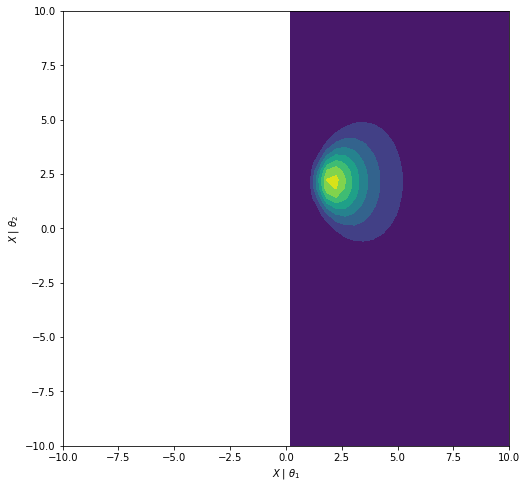

In [240]:
plt.xlabel(r'$X\;|\; \theta_1$')
plt.ylabel(r'$X\;|\; \theta_2$')
plt.contourf(X, Y, likelihoods)
plt.show()

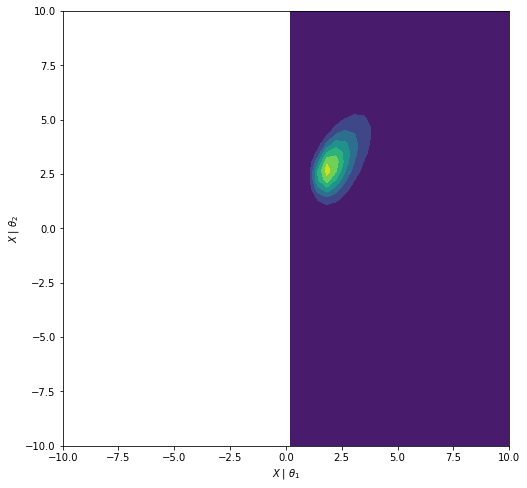

In [241]:
plt.xlabel(r'$X\;|\; \theta_1$')
plt.ylabel(r'$X\;|\; \theta_2$')
plt.contourf(X, Y, posteriors)
plt.show()